# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [26]:
%pip install --quiet pandas

import openpyxl
import pandas as pd
import pandas

Note: you may need to restart the kernel to use updated packages.


## Read in the file `craftcans.csv`, and look at the first first rows

In [27]:
df = pandas.read_csv("craftcans.csv", na_values=["Does not apply"])

df.head(10)


,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.60%,47.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80.0
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.70%,25.0
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.20%,42.0


## How many rows do you have in the data? What are the column types?

In [28]:
print(df.shape)

print(df.dtypes)

(2416, 7)
Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object


# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [29]:
df.groupby("Brewery")["Beer"].count().sort_values(ascending=False).head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
Bonfire Brewing Company       19
Name: Beer, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [30]:
df.head()

df["ABV"].sort_values(ascending=False).head(1)

1104    9.90%
Name: ABV, dtype: object

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [31]:
df["ABV"]

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [32]:
df["ABV"] = df["ABV"].str.replace("%", "")
df["ABV"]

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [33]:
df.dtypes

df["ABV"] = df["ABV"].astype(float)

df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

<Axes: >

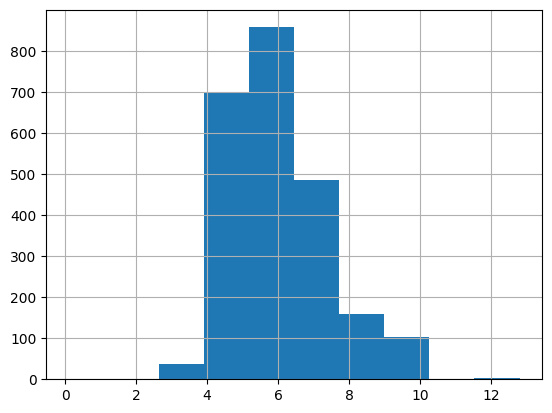

In [34]:
df["ABV"].mean()

df["ABV"].hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [35]:
df[df["ABV"].isnull()].shape[0]

68

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [36]:
df.head()

df["Location"].value_counts().sort_values(ascending=False).head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

In [37]:
df[df["Location"].str.contains("Brooklyn", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
146,Todd the Axe Man,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,7.2,NaN
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
280,Doomtree,Surly Brewing Company,"Brooklyn Center, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.7,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0


## What brewery in Brooklyn puts out the most different cans of beer?

In [38]:
df[df["Location"].str.contains("Brooklyn", na=False)]["Brewery"].value_counts()

Brewery
Sixpoint Craft Ales      24
Surly Brewing Company    13
Brooklyn Brewery          6
Evil Twin Brewing         5
KelSo Beer Company        3
Name: count, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [39]:
df[df["Brewery"].str.contains("Sixpoint Craft Ales", na=False)]["Beer"].value_counts(ascending=False).head(5)

## seems there isn't one..? is this a trick question lol

Beer
4Beans                  1
Jammer                  1
Righteous Ale (2011)    1
Sweet Action (2011)     1
The Crisp (2011)        1
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [40]:
ny_brew = df[df["Location"].str.contains("NY", na=False)].value_counts(ascending=False)

### Now *count* all of the breweries in New York state

In [41]:
ny_brew.value_counts()

count
1    46
Name: count, dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [42]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0


In [43]:
IPA_beer = df[df["Style"].str.contains("IPA", na=False)]
print(IPA_beer)

                       Beer                    Brewery             Location  \
0              Get Together          NorthGate Brewing      Minneapolis, MN   
6            Citra Ass Down  Against the Grain Brewery       Louisville, KY   
14              Rico Sauvin  Against the Grain Brewery       Louisville, KY   
17             Pile of Face  Against the Grain Brewery       Louisville, KY   
24           Habitus (2014)  Mike Hess Brewing Company        San Diego, CA   
...                     ...                        ...                  ...   
2403           Abrasive Ale      Surly Brewing Company  Brooklyn Center, MN   
2406                Furious      Surly Brewing Company  Brooklyn Center, MN   
2408  Brew Free! or Die IPA     21st Amendment Brewery    San Francisco, CA   
2412     GUBNA Imperial IPA        Oskar Blues Brewery         Longmont, CO   
2414      Gordon Ale (2009)        Oskar Blues Brewery         Longmont, CO   

                               Style    Size  ABV  

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [ ]:
df.dtypes

df["IBUs"] = df["IBUs"].astype(float)


### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [53]:
df = df.dropna(subset=["IBUs"])

df["IBU"] = df["IBUs"].astype(float)

df["IBU"].value_counts(normalize=True, dropna=True)

df["IBU"].mean()

np.float64(42.73984319315752)

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: >

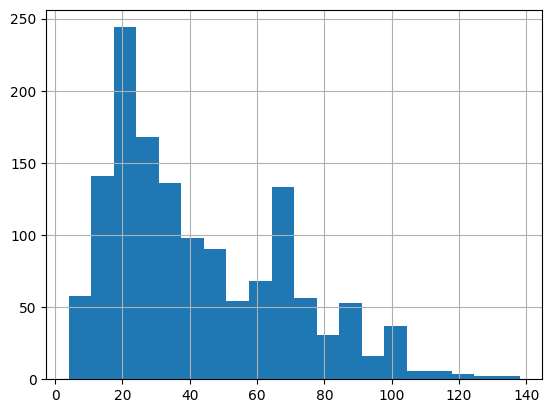

In [54]:
df["IBU"].hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [ ]:
df[df["IBU"] >= df["IBU"].quantile(0.75)]

# found this online, are quantile and percentile the same?

,Beer,Brewery,Location,Style,Size,ABV,IBUs,IBU
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0,80.0
...,...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0,65.0
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0,98.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0,100.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0,85.0


## List all of the beers with IBUs below the 25th percentile

In [59]:
df[df["IBU"] <= df["IBU"].quantile(0.25)]


,Beer,Brewery,Location,Style,Size,ABV,IBUs,IBU
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0,19.0
11,Flesh Gourd'n,Against the Grain Brewery,"Louisville, KY",Pumpkin Ale,16 oz.,6.6,21.0,21.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0,20.0
...,...,...,...,...,...,...,...,...
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.5,18.0,18.0
2395,Dunkel Lager,Sly Fox Brewing Company,"Pottstown, PA",Munich Dunkel Lager,12 oz.,5.3,21.0,21.0
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.6,11.0,11.0
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.1,20.0,20.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [64]:
df.groupby("Style")["IBU"].median().sort_values(ascending=False)

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Herbed / Spiced Beer                  15.0
Light Lager                           12.0
Gose                                  10.0
American Adjunct Lager                 9.0
Berliner Weissbier                     8.0
Name: IBU, Length: 90, dtype: float64

<Axes: >

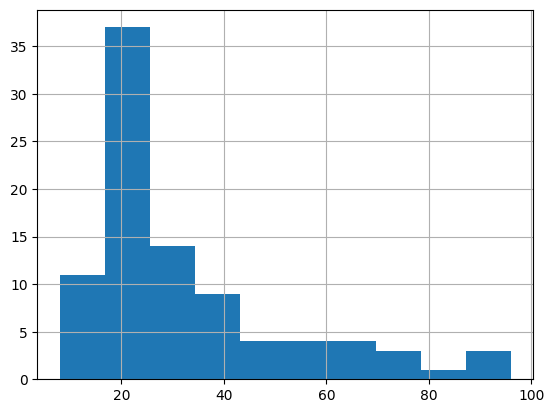

In [65]:
df.groupby("Style")["IBU"].median().sort_values(ascending=False).hist()

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [74]:
df.groupby("Style")["IBU"].count().sort_values(ascending=False).head(5)

Style
American IPA                      301
American Pale Ale (APA)           153
American Amber / Red Ale           77
American Double / Imperial IPA     75
American Pale Wheat Ale            61
Name: IBU, dtype: int64

In [75]:
df.groupby("Style")["IBU"].count().sort_values(ascending=True).head(5)

Style
American Double / Imperial Pilsner    1
English Pale Mild Ale                 1
English Stout                         1
Belgian Strong Dark Ale               1
Euro Pale Lager                       1
Name: IBU, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [78]:
df[df["Style"].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])]["IBU"].mean()

np.float64(18.982142857142858)

## Draw a histogram of the IBUs of those beers

<Axes: >

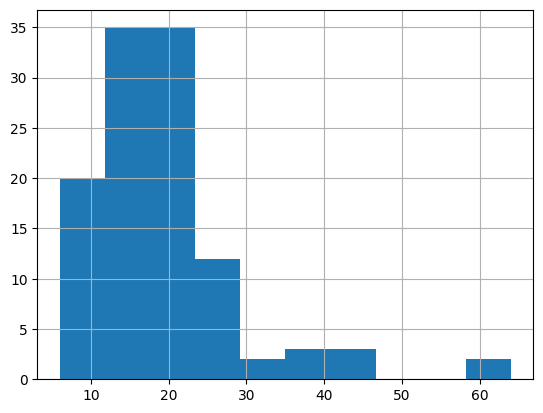

In [80]:
df[df["Style"].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])]["IBU"].hist()

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [82]:
df[df["Style"].str.contains("IPA")]["IBU"].mean()

np.float64(71.94897959183673)

<Axes: >

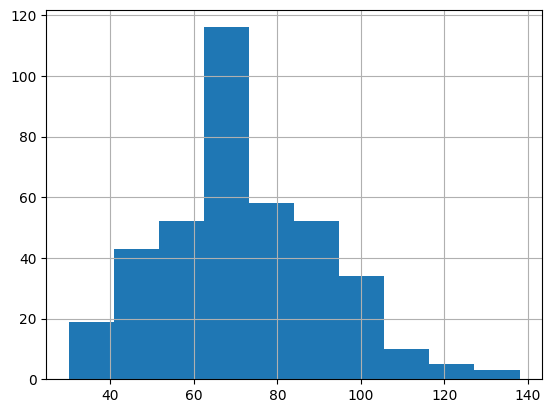

In [84]:
df[df["Style"].str.contains("IPA")]["IBU"].hist()

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

<Axes: >

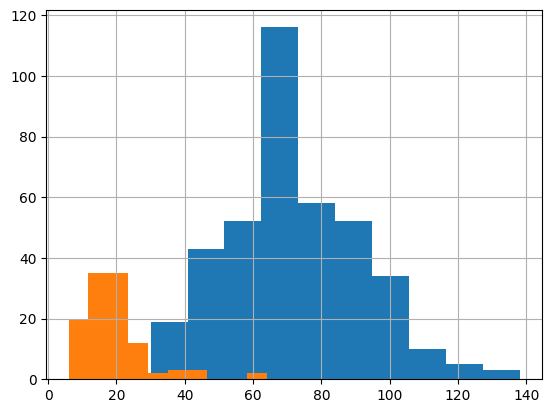

In [ ]:
df[df["Style"].str.contains("IPA")]["IBU"].hist()

df[df["Style"].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])]["IBU"].hist()


## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

<Axes: >

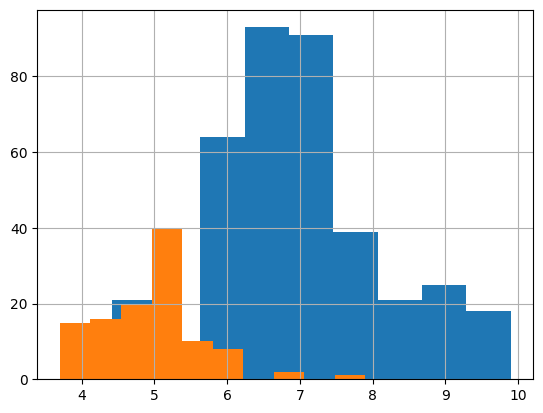

In [86]:
df[df["Style"].str.contains("IPA")]["ABV"].hist()

df[df["Style"].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])]["ABV"].hist()


In [89]:
df[df["Style"].str.contains("IPA")]["ABV"].mean()

np.float64(6.914285714285714)

In [90]:
df[df["Style"].isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])]["ABV"].mean()


np.float64(4.915178571428571)

## Good work!